In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np


In [2]:
((x_train,y_train),(x_test,y_test))=mnist.load_data()
x_train=x_train.reshape((x_train.shape[0],28*28*1))
x_test=x_test.reshape((x_test.shape[0],28*28*1))
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
y_test=lb.transform(y_test)


In [6]:
model=Sequential()
model.add(Dense(128,input_shape=(784,),activation="sigmoid"))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
sgd=SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=128);


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1228 - loss: 2.3455 - val_accuracy: 0.2086 - val_loss: 2.2503
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3152 - loss: 2.2380 - val_accuracy: 0.3976 - val_loss: 2.1869
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4713 - loss: 2.1715 - val_accuracy: 0.4868 - val_loss: 2.0994
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5313 - loss: 2.0769 - val_accuracy: 0.5932 - val_loss: 1.9743
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5812 - loss: 1.9447 - val_accuracy: 0.6340 - val_loss: 1.8077
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6177 - loss: 1.7741 - val_accuracy: 0.6451 - val_loss: 1.6160
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6448 - loss: 1.5840 - val_accuracy: 0.6869 - val_loss: 1.4267
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6810 - loss: 1.4039 - val_accuracy: 0.

In [10]:
predictions=model.predict(x_test,batch_size=128)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       980
           1       0.76      0.99      0.86      1135
           2       0.84      0.75      0.79      1032
           3       0.69      0.83      0.75      1010
           4       0.66      0.84      0.74       982
           5       0.78      0.52      0.63       892
           6       0.83      0.86      0.85       958
           7       0.72      0.86      0.79      1028
           8       0.85      0.50      0.63       974
           9       0.72      0.42      0.53      1009

    accuracy                           0.76     10000
   macro avg       0.77      0.75      0.74     10000
weighted avg       0.77      0.76      0.75     10000



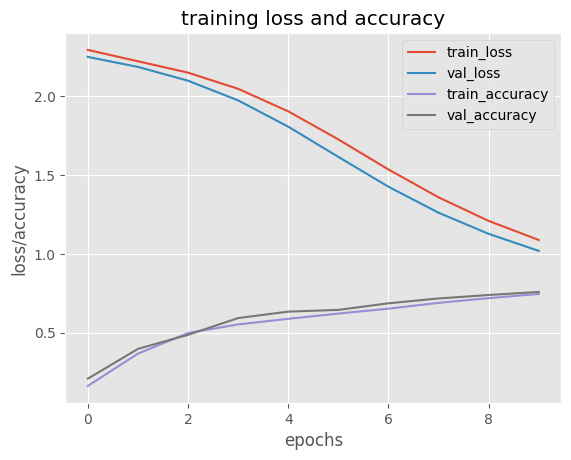

In [9]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,epochs),H.history['loss'],label="train_loss")
plt.plot(np.arange(0,epochs),H.history['val_loss'],label="val_loss")
plt.plot(np.arange(0,epochs),H.history['accuracy'],label="train_accuracy")
plt.plot(np.arange(0,epochs),H.history['val_accuracy'],label="val_accuracy")
plt.title("training loss and accuracy")
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.legend()
